In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [3]:
def openDataSet(file_name=None):

    if file_name == None:
        print("Give proper file name")
        return
    
    rating_data = pd.read_csv(file_name)
    rating_data.drop("TimeStamp", axis=1, inplace=True)
    rating_data.drop("Time", axis=1, inplace=True)

    return rating_data

# funtion that load the data set into our program
def loadData(data_set = None):

    if (data_set == None):
        return None
    else:
        data = []
        fptr = open(data_set, "r")
        lines = fptr.readlines()
        for line in lines:
            line = line.strip().split()
            for i in range(len(line)):
                if line[i] == -1:
                    line[i] = float(2)
                else:
                    line[i] = float(line[i])
            # print(line)
            data.append(line)
        
        return np.array(data)

In [20]:
def giveCorrelationGraph(data_set, rating_data_driver, driver_name):

    window_size = 10 * 32  # 10 seconds * 32 frames/second
    num_windows = len(data_set) // window_size
    acc_magnitudes = []
    windowed_wrist_movement = []

    for i in range(num_windows):
        start_index = i * window_size
        end_index = (i + 1) * window_size
        acc_window = data_set[start_index:end_index]
        acc_magnitude = np.sqrt(acc_window[0]**2 + acc_window[1]**2 + acc_window[2]**2).mean()
        acc_magnitudes.append(acc_magnitude)

        wrist_window = data_set[start_index:end_index, 3]
        windowed_wrist_movement.append(int(np.median(wrist_window, axis=0)))

        # if len(acc_magnitudes) >= 90: 
        #     break

    min_length = min(len(acc_magnitudes), len(rating_data_driver))

    pearson_correlation, _ = pearsonr(acc_magnitudes[:min_length], rating_data_driver[:min_length])

    
    print(f"Pearson Correlation between ACC magnitude and driver ratings of driver {driver_name} : ", abs(pearson_correlation))

    spearman_correlation_wrist_movement, _ = spearmanr(windowed_wrist_movement[:min_length], rating_data_driver[:min_length])

    print(f"Spearman Correlation between aggregated wrist movement and driver ratings {driver_name} : ", abs(spearman_correlation_wrist_movement))


    plt.figure(figsize=(8, 6))
    plt.scatter(acc_magnitudes[:min_length], rating_data_driver[:min_length], color='blue', alpha=0.5)
    plt.title(f'Average ACC Magnitude vs. Driver Ratings of driver {driver_name}')
    plt.xlabel('Average ACC Magnitude')
    plt.ylabel('Driver Ratings')
    plt.grid(True)
    plt.show()

    if len(windowed_wrist_movement) % 3 != 0:
        # global windowed_wrist_movement
        dummy = len(windowed_wrist_movement) % 3

        windowed_wrist_movement = windowed_wrist_movement[:len(windowed_wrist_movement) - dummy]

    windowed_wrist_movement = np.array(windowed_wrist_movement).reshape(-1, 3)
    windowed_wrist_movement_df = pd.DataFrame(windowed_wrist_movement, columns=['wrist_movement_left', 'wrist_movement_right', 'wrist_movement_straight'])


    rating_data_driver = rating_data_driver.reindex(windowed_wrist_movement_df.index)

    plt.boxplot([rating_data_driver[windowed_wrist_movement_df['wrist_movement_left'] != 0], 
                rating_data_driver[windowed_wrist_movement_df['wrist_movement_right'] != 0], 
                rating_data_driver[windowed_wrist_movement_df['wrist_movement_straight'] != 0]], 
                labels=['Left', 'Right', 'Straight'])
    plt.title(f'Distribution of Ratings by Wrist Movement of driver {driver_name}')
    plt.xlabel('Wrist Movement')
    plt.ylabel('Rating')
    plt.ylim(1, 5)  # Set y-axis limits to match rating scale
    plt.show()
    
    

In [5]:
def plotGraph(data_set, rating_data_driver, driver_name):

    window_size = 10 * 32  # 10 seconds * 32 frames/second
    num_windows = len(data_set) // window_size
    acc_magnitudes = []
    min_length = min(num_windows, len(rating_data_driver))

    for i in range(min_length):
        start_index = i * window_size
        end_index = (i + 1) * window_size
        acc_window = data_set[start_index:end_index]
        acc_magnitude = np.sqrt(acc_window[0]**2 + acc_window[1]**2 + acc_window[2]**2).mean()
        acc_magnitudes.append(acc_magnitude)
    
    plt.figure(figsize=(8, 6))
    plt.scatter(acc_magnitudes, rating_data_driver[:min_length], color='blue', alpha=0.5)
    plt.title(f'Average ACC Magnitude vs. Driver Ratings of driver {driver_name}')
    plt.xlabel('Average ACC Magnitude')
    plt.ylabel('Driver Ratings')
    plt.grid(True)
    plt.show()

In [11]:
rating_data_driver_1 = openDataSet("3_19/Rating.csv")
rating_data_driver_1 = pd.Series(rating_data_driver_1['Rating'])
data_set_1 = loadData("3_19/visual_annotion_3_19.txt")


# rating_data_driver_2 = 

Pearson Correlation between ACC magnitude and driver ratings of driver 1 :  0.049502359503902714
Spearman Correlation between aggregated wrist movement and driver ratings 1 :  0.17488363321241257


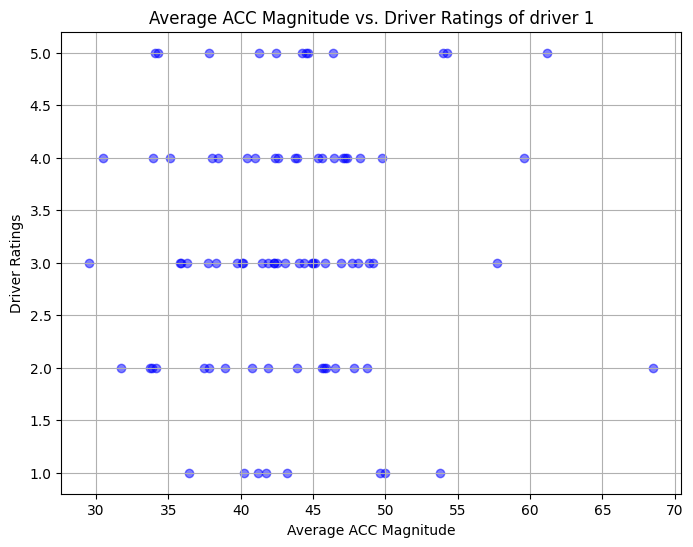

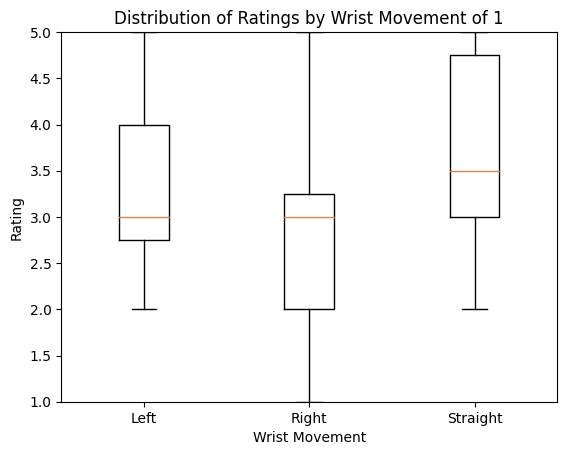

In [12]:
giveCorrelationGraph(data_set_1, rating_data_driver_1, 1)

Pearson Correlation between ACC magnitude and driver ratings of driver 2 :  0.08249195213904198
Spearman Correlation between aggregated wrist movement and driver ratings 2 :  0.0014638318196633544


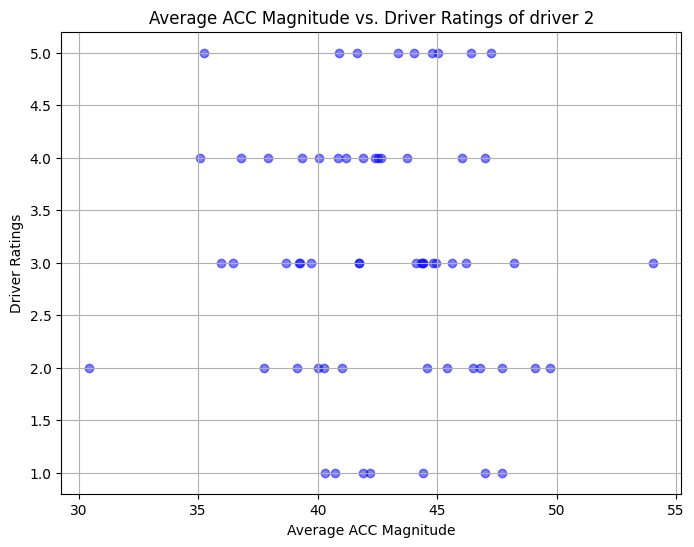

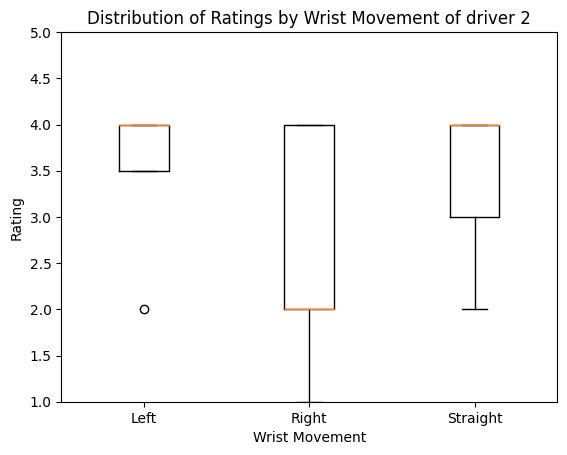

In [21]:
rating_data_driver_2 = openDataSet("4_57/Rating.csv")
rating_data_driver_2 = pd.Series(rating_data_driver_2['Rating'])
data_set_2 = loadData("4_57/visual_annotation_4_57.txt")

giveCorrelationGraph(data_set_2, rating_data_driver_2, 2)

Pearson Correlation between ACC magnitude and driver ratings of driver 3 :  0.00317679493651998
Spearman Correlation between aggregated wrist movement and driver ratings 3 :  0.01158068853111942


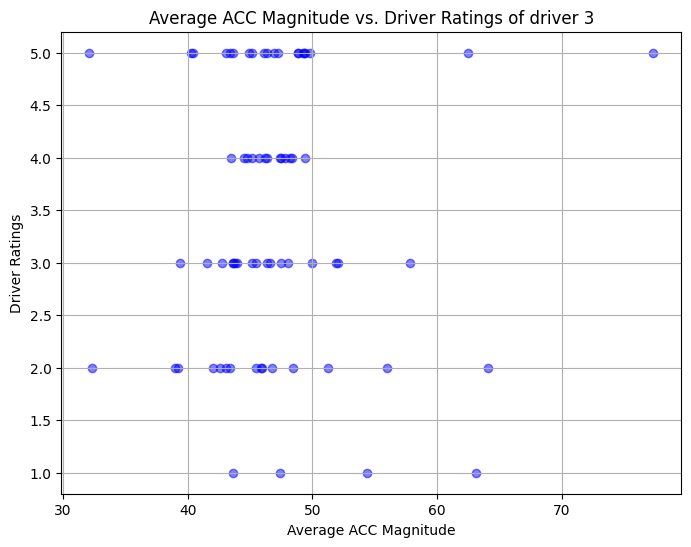

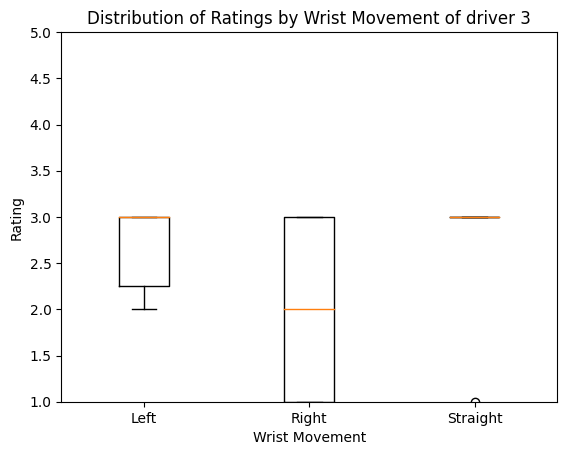

In [16]:
rating_data_driver_3 = openDataSet("5_11/Rating.csv")
rating_data_driver_3 = pd.Series(rating_data_driver_3['Rating'])
data_set_3 = loadData("5_11/visual_annotion_5_11.txt")

giveCorrelationGraph(data_set_3, rating_data_driver_3, 3)

Pearson Correlation between ACC magnitude and driver ratings of driver 4 :  0.06562577844560391
Spearman Correlation between aggregated wrist movement and driver ratings 4 :  0.09730659223347485


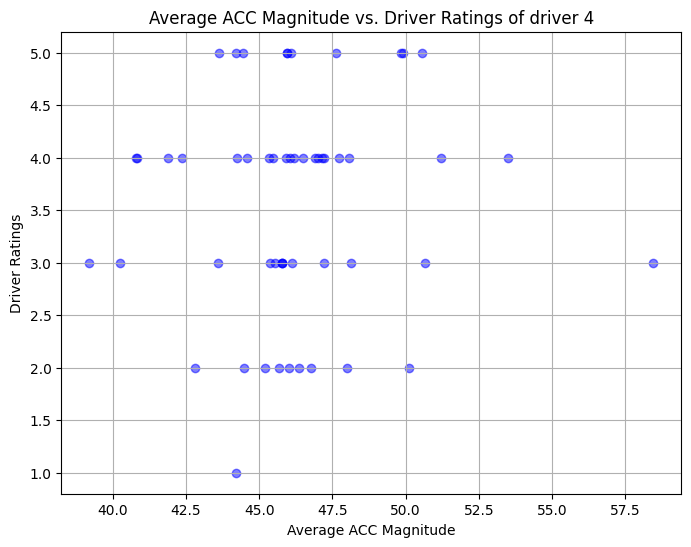

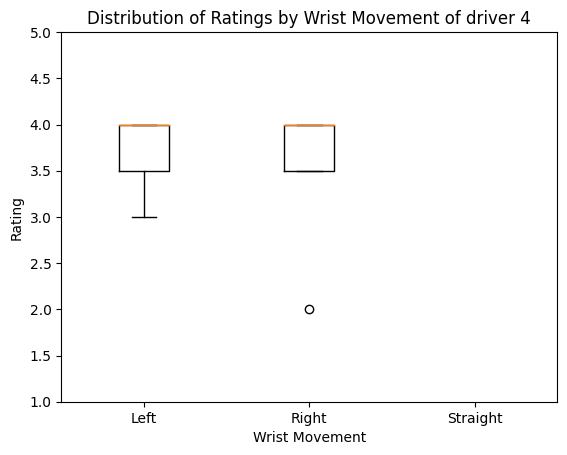

In [22]:
rating_data_driver_4 = openDataSet("Australia/Rating.csv")
rating_data_driver_4 = pd.Series(rating_data_driver_4['Rating'])
data_set_4 = loadData("Australia/visual_annotation_aus.txt")

giveCorrelationGraph(data_set_4, rating_data_driver_4, 4)

In [131]:
window_size = 10 * 32  # 10 seconds * 32 frames/second
num_windows = len(data_set_1) // window_size
acc_magnitudes = []
windowed_wrist_movement = []

for i in range(num_windows):
    start_index = i * window_size
    end_index = (i + 1) * window_size
    acc_window = data_set_1[start_index:end_index]
    acc_magnitude = np.sqrt(acc_window[0]**2 + acc_window[1]**2 + acc_window[2]**2).mean()
    acc_magnitudes.append(acc_magnitude)

    wrist_window = data_set_1[start_index:end_index, 3]
    windowed_wrist_movement.append(int(np.median(wrist_window, axis=0)))

    # if len(acc_magnitudes) >= 90: 
    #     break

pearson_correlation, _ = pearsonr(acc_magnitudes, rating_data_driver_1[:len(acc_magnitudes)])

print("Pearson Correlation between ACC magnitude and driver ratings:", pearson_correlation, _)

spearman_correlation_wrist_movement, _ = spearmanr(windowed_wrist_movement, rating_data_driver_1[:len(acc_magnitudes)])

print("Spearman Correlation between aggregated wrist movement and driver ratings:")
print(spearman_correlation_wrist_movement, _)

# spearman_correlation, _ = spearmanr(acc_magnitudes, ratings)

ValueError: x and y must have the same length.

In [109]:
windowed_wrist_movement_1 = np.array(windowed_wrist_movement).reshape(-1, 3)
windowed_wrist_movement_df = pd.DataFrame(windowed_wrist_movement_1, columns=['wrist_movement_left', 'wrist_movement_right', 'wrist_movement_straight'])


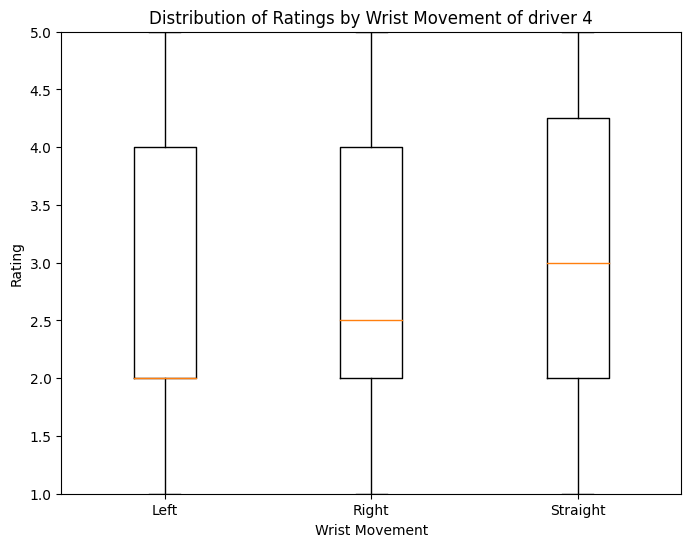

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Generate random data for wrist movement (1 for movement present, 0 for no movement)
num_windows = 50
window_size = 10 * 32  # 10 seconds * 32 frames/second
wrist_movement_data = np.random.choice([-1, 0, 1], size=(num_windows, 3), replace=True)  # Generate for 3 types of movement

# Generate random data for ratings
ratings_windowed = pd.Series(np.random.randint(1, 6, size=num_windows))

# Create DataFrame for wrist movement data
windowed_wrist_movement_df = pd.DataFrame(wrist_movement_data, columns=['wrist_movement_left', 'wrist_movement_right', 'wrist_movement_straight'])

# Plotting
plt.figure(figsize=(8, 6))

# Box plot for each type of wrist movement
plt.boxplot([
    ratings_windowed[windowed_wrist_movement_df['wrist_movement_left'] != 0], 
    ratings_windowed[windowed_wrist_movement_df['wrist_movement_right'] != 0], 
    ratings_windowed[windowed_wrist_movement_df['wrist_movement_straight'] != 0]
], labels=['Left', 'Right', 'Straight'])

plt.title('Distribution of Ratings by Wrist Movement of driver 4')
plt.xlabel('Wrist Movement')
plt.ylabel('Rating')
plt.ylim(1, 5)  # Set y-axis limits to match rating scale
plt.show()
